# Projet Théorie des langages

## Introduction
Le projet a lieu dans le cadre du cours de théories des langages réalisé au Semestre 2 de la deuixème année de Licence Sciences du Numérique. 
Il a été réalisé par Candice Giami et Clément Szewczyk. 

L'objectif du projet est d'implémenter une bibliotèque de fonction sur les automates en **python**. 

Les étapes du projet : 
- modélisation d’un automate.
- de charger la description d’un automate sous forme d’un fichier texte (texte brut, json, xml…) dont vous définirez
le format
- de sauvegarder la description d’un automate sous forme d’un fichier texte dont le format respecte celui en lecture
- d’afficher l’automate à l’écran ou de générer un fichier image.
- Réaliser des opérations élémentaires sur les automates (union, concaténation et répétition)
- Synchroniser un automate (suppression des 𝜖-transitions) **(BONUS)**
- Construire un automate à partir d’une expression régulière **(BONUS)**
- Compléter/Déterminiser/Minimiser un automate
- Reconnaitre une adresse mail à l’aide d’un automate

Les étapes sont découpé en 4 parties :
1. Modélisation d'un automate
2. Opérations sur les automates
3. Expressions régulières verd Automates (Bonus)
4. Finalisation

## Rapport du projet

Le rapport est réalisé avec Jupiter Notebook. Il est disponible dans le dossier `rapport`.
Pour avoir l'affichage des automates au sein du rapport, nous avons utilisé la bibliothèque `IPython` en particulier la fonction `display` et la fonction `Image`. 

```python

from IPython.display import display, Image

# Pour afficher un automate (exemple)
display(Image(filename='automate.png'))

```

Si nous éxécutons le code ci-dessus dans un notebook, nous aurons l'affichage de l'automate. Par contre, si nous exécutons le code dans un fichier python, nous n'aurons pas l'affichage de l'automate mais la ligne suivante dans la console : 

```bash
<IPython.core.display.Image object>
```

## Les différents fichiers/dossiers

- `automate.py` : contient la classe `Automate` qui permet de modéliser un automate. Cette contient les méthode permettant de travailler sur un automate. 
- `etat.py` : contient la classe `Etat` qui permet de modéliser un état.
- `transition.py` : contient la classe `Transition` qui permet de modéliser une transition.
- Le dossier `partie1` contient les fichiers suivants :
    - `modelisation.py` : contient les pour la modélisation d'un automate. Mais aussi l'importation et l'exportation d'un automate.
- Le dossier `partie2` contient les fichiers suivants :
    - Dossier `Union` : contient les fichiers de test pour l'union de deux automates.
    - Dossier `Concatenation` : contient les fichiers de test pour la concaténation de deux automates.
    - Dossier `Repetition` : contient les fichiers de test pour la répétition d'un automate.
## Les différentes classes

### Classe `Etat`

La classe `Etat` permet de modéliser un état. Elle a les attributs suivants :
- `nom` : un nom d'état
- `initial` : un booléen indiquant si l'état est initial
- `terminal` : un booléen indiquant si l'état est terminal

### Classe `Transition`

La classe `Transition` permet de modéliser une transition. Elle a les attributs suivants :
- `depart` : l'état de départ de la transition
- `symbole` : le ou les symbole(s) de la transition
- `arrivee` : l'état d'arrivée de la transition

### Classe `Automate`

La classe `Automate` permet de modéliser un automate. Elle a les attributs suivants :
-  `etats` : une liste d'états (instances de la classe `Etat`)
- `alphabet` : un ensemble de symboles
- `transitions` : une liste de transitions (instances de la classe `Transition`)

## Partie 1 : Modélisation d'un automate

### 1.1. Modélisation d'un automate

Pour modéliser un automate, nous utilisons la classe `Automate`, la classe `Etat` et la classe `Transition` (déjà présenté ci-dessus).

1. Initialisation de l'automate : on crée une instance de la classe `Automate` et on y ajoute l'alphabet de l'automate lors de l'initialisation. 
```python
alphabet={'a', 'b', 'c'}	
automate = Automate(alphabet)
```
2. Ajout d'états : on crée des instances de la classe `Etat` et on les ajoute à l'automate. Les paramètres de la classe `Etat` sont le nom de l'état, un booléen indiquant si l'état est terminal et un booléen indiquant si l'état est initial. 
```python
automate.ajouter_etat(Etat('q0', True, False))
```	
3. Ajout de transitions : on crée des instances de la classe `Transition` et on les ajoute à l'automate. Les paramètres de la classe `Transition` sont l'état de départ, le ou les symbole(s) de la transition et l'état d'arrivée. 
```python
automate.ajouter_transition(Transition('q0', 'a', 'q1'))
```

Notre automate est maintenant créé. Mais nous ne pouvons pas encore l'afficher. 

### 1.2. Affichage de l'automate

Pour obtenir une image, nous allons convertir notre automate en dot et ensuite en png. Nous utilisons la bibliothèque `graphviz`. 

```python
# Convertir l'automate en dot
automate.to_dot()

# Convertir le fichier dot en png
automate.to_png("automate")
```
La méthode `to_dot` retourne une chaîne de caractères représentant l'automate au format dot. La méthode `to_png` crée un fichier png représentant l'automate.

On n'est pas obligé de passer par la méthode `to_dot` pour afficher l'automate. On peut directement passer par la méthode `to_png` qui va appeler la méthode `to_dot` pour nous. 

Pour afficher l'automate, nous utilisons la fonction `display` de la bibliothèque `IPython`. 

Pour voir le résultat, il suffit d'ouvir le fichier `automate.png` qui a été créé.


### 1.3 Importation / Export d'un automate

- `export` : est une fonction qui permet d'exporter un Automate et prend en paramètre l'automate à exporter (self) et le nom du fichier. 
La fonction crée un fichier avec le nom donné si celui n'existe pas. Sinon elle modifie le fichier. 
La structure du fichier d'exportation est la suivante : 
    - Ligne 1 : Alphabet de l'automate
    - Ligne 2 : États de l'automate
    - Ligne 3 : États initiaux 
    - Ligne 4 : États terminaux
    - A partir de la ligne 5, nous retrouvons les transition avec la structure suivante : `état départ` `symbols` `état fin`

- `importation` : est une fonction qui permet d'importer un automate depuis un fichier texte et prend en paramètre le nom du fichier texte. 
La fonction rempli d'abord les variables qui vont nous permettre de créer l'automate. Pour cela elle suit la logique expliqué précédement. 
Une fois cela effectué, elle crée un nouvel automate qu'elle retourne. 

La paricularité de la fonction 'importation' est qu'elle est défini en dehors de la classe `Automate`. 

**Exemple d'utilisation**

```python
# Exporter un automate
automate.export("automate.txt")

# Importer un automate
automate = importation("automate.txt")
```


### 1.4 Exemple d'automate

Voici un exemple de modélisation d'un automate. Le code de cette exemple est disponible dans le fichier `partie1/modelisation.py`. 


Automate 1

Alphabet: ['a', 'b', 'c', 'd']
Etats: 1, 2, 3, 4
Etats terminaux: 3
Etat initial: 1
Transitions: 
1 --['a', 'b']--> 2
2 --b--> 3
3 --c--> 4
4 --d--> 1

Automate 1 au format dot

digraph {
	rankdir=LR
	init1 [shape=point]
	init1 -> 1 [label=""]
	1
	2
	3 [shape=doublecircle]
	3
	4
	1 -> 2 [label="a,b"]
	2 -> 3 [label=b]
	3 -> 4 [label=c]
	4 -> 1 [label=d]
}

Automate 1 au format png



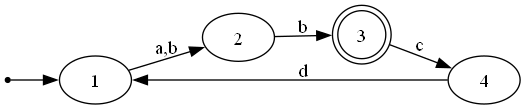

Automate 1 exporté dans modelisation1.txt

 


Automate 2 importé depuis modelisation1.txt

Automate 2

Alphabet: {'a', 'd', 'b', 'c'}
Etats: 3, 2, 1, 4
Etats terminaux: 3
Etat initial: 1
Transitions: 
1 --['a', 'b']--> 2
2 --['b']--> 3
3 --['c']--> 4
4 --['d']--> 1

Automate 2 au format png



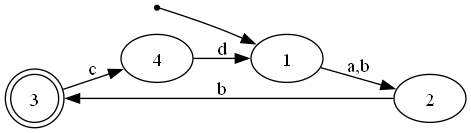

In [1]:
%run ../partie1/modelisation.py

## Partie 2 : Opérations sur les automates

### 2.1. Union de deux automates

#### 2.1.1 Méthode 'union'
La fonction `union` est une méthode statique de la classe `Automate`. Elle permet de réaliser l'union de deux automates. Elle prend en paramètre deux automates et retourne un nouvel automate qui est l'union des deux automates passés en paramètre. 


**Explication de la méthode `union`**

Pour réaliser l'union de deux automates, nous suivons les étapes suivantes : 

- Union des alphabets : on réalise l'union des alphabets des deux automates
- Ajout du symbole vide
- On renomme les états des deux automates pour éviter les conflits de noms
- On ajoute un nouvel état initial et on ajoute une transition de cet état vers les états initiaux des deux automates
-  Ajout des états des deux automates en vérifiant si les états sont déjà présents
- Ajout des transitions des deux automates en vérifiant si les transitions sont déjà présentes. Ici nous renommons aussi les états. 


#### 2.1.2 Exemple d'utilisation

Pour utiliser la fonction `union`, il suffit de l'appeler en passant en paramètre deux automates. 

```python
automate = union(automate1, automate2)
```
Voici un résultat d'un exemple d'union d'automates.
On éxécute le fichier `partie2/union/union.py` pour voir le résultat.

automate1


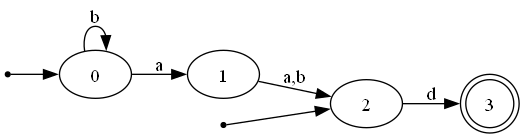

automate2


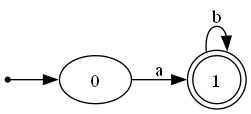




Union des deux automates :

Alphabet: {'', 'd', 'a', 'b'}
Etats: initial, A1_0, A1_1, A1_2, A1_3, A2_0, A2_1
Etats terminaux: A2_1
Etat initial: initial
Transitions: 
initial ----> A1_0
initial ----> A1_2
initial ----> A2_0
A1_0 --['b']--> A1_0
A1_0 --['a']--> A1_1
A1_1 --['a', 'b']--> A1_2
A1_2 --['d']--> A1_3
A2_0 --['a']--> A2_1
A2_1 --['b']--> A2_1





 Résultat de l'union des deux automates :


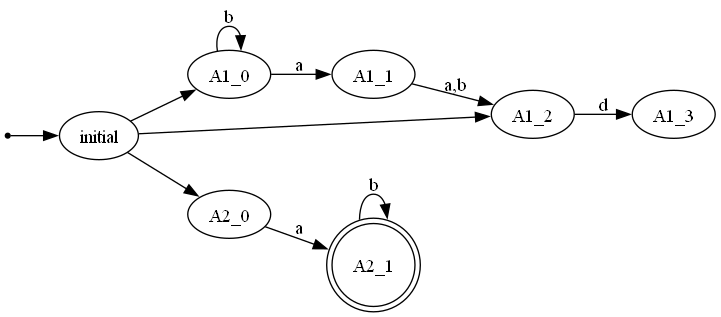

In [2]:
%run ../partie2/union/union.py

### 2.2 Concaténation de deux automates. 

#### 2.2.1 Méthode 'concatenation'

La fonction `concatenation` est une méthode statique de la classe `Automate`. Elle permet de réaliser la concaténation de deux automates. Elle prend en paramètre deux automates et retourne un nouvel automate qui est la concaténation des deux automates passés en paramètre.

**Explication de la méthode `concatenation`**

Pour réaliser la concaténation de deux automates, nous suivons les étapes suivantes :

- Union des alphabets : on réalise l'union des alphabets des deux automates
- Ajout du symbole vide
- On renomme les états des deux automates pour éviter les conflits de noms
- On ajoute l'automate 1 au nouvel automate
- On ajout un etat temporaire permettant de faire la transition entre l'automate 1 et l'automate 2
- On lie l'état final de l'automate 1 à l'état temporaire
- On lie l'état temporaire à l'état initial de l'automate 2
- On ajoute l'automate 2 au nouvel automate

#### 2.2.2 Exemple d'utilisation

Pour utiliser la fonction `concatenation`, il suffit de l'appeler en passant en paramètre deux automates.

```python
automate = concatenation(automate1, automate2)
```

Voici un résultat d'un exemple de concaténation d'automates. Le code est disponible dans le fichier `partie2/concatenation/concatenation.py`.

Automate 1:


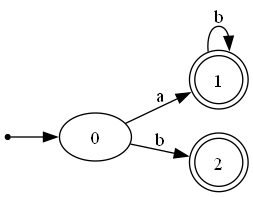

Automate 2:


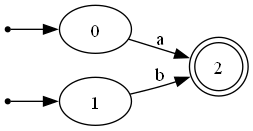




Concatenation des deux automates :

Alphabet: {'', 'a', 'b'}
Etats: temporaire, A1_0, A1_1, A1_2, A2_0, A2_1, A2_2
Etats terminaux: A2_2
Etat initial: A1_0
Transitions: 
A1_1 ----> temporaire
A1_2 ----> temporaire
A1_0 --['a']--> A1_1
A1_1 --['b']--> A1_1
A1_0 --['b']--> A1_2
temporaire ----> A2_0
temporaire ----> A2_1
A2_0 --['a']--> A2_2
A2_1 --['b']--> A2_2



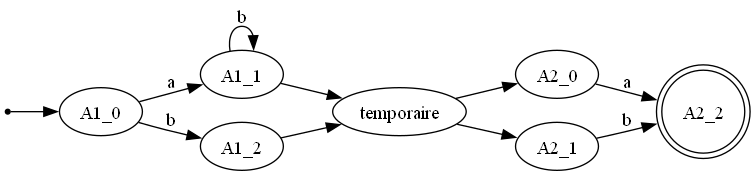

In [3]:
%run ../partie2/concatenation/concatenation.py

### 2.3 Répétion d'un automate 

#### 2.3.1 Méthode `repetition`

#### 2.3.2 Exemple d'utilisation

## Partie 4 : Finalisation

### 4.1 Compléter un automate

#### 4.1.1 Méthode `compléter`

La méthode `compléter` permet de compléter un automate. ELle prend en paramètre l'automate à compléter et retourne un nouvel automate qui est le complément de l'automate passé en paramètre.

**Explication de la méthode `compléter`**
- Ajout d'un état puit
- On parcours les états de l'automate 
    - On récupère les symboles des transitions de l'état
    - On ajoute une transition vers l'état puit pour chaque symbole manquant

#### 4.1.2 Exemple d'utilisation


Création de l'automate 1 non complet
Automate 1 non complet


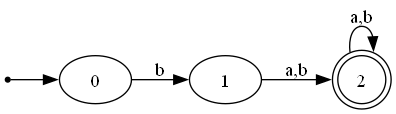

Automate 1 complet


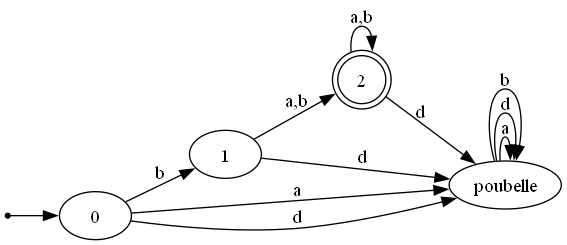

In [4]:
%run ../partie4/completer/completer.py

### 4.2 Déterminisation

#### 4.2.1 Méthode `est_deterministe`

Cette méthode permet de savoir si un automate est déterministe ou pas. La fonction retourne True ou False. 

On regarde pour chaque état s'il y a la précense de plus d'une fois pour un même symbole. 

**Exemple d'utilisation**

```python
est_deterministe = automate.est_derterministe()
```
Voici un exemple d'utilisation de la méthode `est_deterministe` qui se trouve dans le fichier suivant : `partie4/determinisation/est_deterministe.py`.

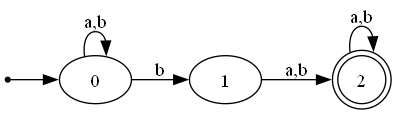

L'automate est déterministe : False


In [5]:
%run ../partie4/determinisation/est_deterministe.py

Pour réaliser la determinisation d'un automate, nous l'avons fait en deux étapes :
- Réalisation de la table de transition
- Création de l'automate deterministe

Pour tester la determinisation d'un automate, nous avons créé un automate non deterministe. 

![Automate non deterministe](automate1_non_deterministe.png)

#### 4.2.2 Méthode `table_transition_determinisation`

Cette méthode permet de réaliser la table de transition pour la determinisation d'un automate.

**Explication de la méthode `table_transition_determinisation`**

Pour réaliser la table de transition, nous suivons les étapes suivantes :
- On récupère les états initiaux de l'automate
- On initialise une liste d'état à traiter avec les états initiaux
- On initialise une liste d'état traité vide
- On initialise un dictionnaire vide
- Tant que la liste d'état à traiter n'est pas vide
    - On récupère les transitions pour chaque état de la liste d'état à traiter
    - On ajoute les transitions dans le dictionnaire
    - On ajoute les états d'arrivée dans la liste d'état à traiter
    - On ajoute l'état de départ dans la liste d'état traité
    - On retire l'état de départ de la liste d'état à traiter

**Exemple d'utilisation**

Pour utiliser la méthode `table_transition_determinisation`, il suffit de l'appeler en passant en paramètre l'automate à determiniser.

```python
table = automate.table_transition_determinisation()
```
On peut aussi afficher la table de transition en utilisant la fonction `afficher_table` qui prend en paramètre l'automate. La fonction appelle la méthode `table_transition_determinisation` et affiche le résultat de manière plus lisible. 

```python
automate.afficher_table()
```


In [6]:
%run ../partie4/determinisation/table_transition.py

('0',) {'a': ('0',), 'd': (), 'b': ('0', '1')}
('0', '1') {'a': ('0', '2'), 'd': (), 'b': ('0', '1', '2')}
('0', '1', '2') {'a': ('0', '2'), 'd': (), 'b': ('0', '1', '2')}
('0', '2') {'a': ('0', '2'), 'd': (), 'b': ('0', '1', '2')}


#### 4.2.3 Méthode `determiniser`

Cette méthode permet de determiniser un automate.

**Explication de la méthode `determiniser`**

- On créé un nouvel automate deterministe avec l'alphabet de l'automate
- On réalise la table de transition
- On liste les états initiaux
- On liste les états terminaux
- On ajoute les états de la table de transition à l'automate deterministe en vériant si l'état est terminal ou non
- Le premier état de la table de transition est l'état initial de l'automate deterministe
- On ajoute les transitions de la table de transition à l'automate deterministe

**Exemple d'utilisation**

Pour utiliser la méthode `determiniser`, il suffit de l'appeler en sur l'automate à determiniser.

```python
automate.determiniser()
```
Voici un exemple d'utilisation de la méthode `determiniser` qui se trouve dans le fichier suivant : `partie4/determinisation/determinisation.py`.

Automate 1 non déterministe


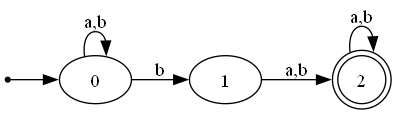

Déterminisation de l'automate 1


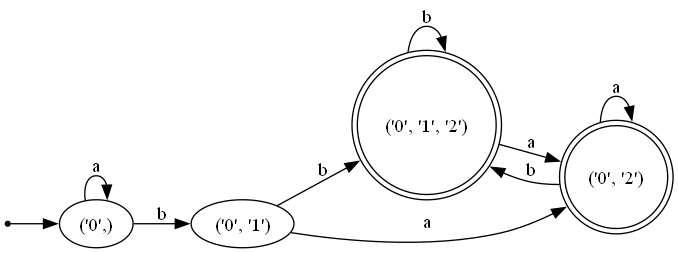

In [7]:
%run ../partie4/determinisation/determinisation.py

### 4.3 Minimisation

La méthode `minimiser` permet de minimiser un automat en utilisant l'algorithme de moore. 

Pour réaliaser la minimisation, nous avons deux fonctions internes à la méthode `minimiser` :
- `trouver_groupe` : permet de trouver les groupes d'états
- `diviser_partition`: permet de diviser les groupes en fonction d'un symbole

#### 4.3.1 Explication de la méthode `trouver_groupe`

Paramètres :
- 'etat' : l'état pour lequel on cherche le groupe

Elle parcours la partition qui est une liste de groupe d'états en cherchant si l'etat pris en paramètre est dans un groupe. Si l'état est dans un groupe, on retourne le groupe. Sinon on retourne -1.

#### 4.3.2 Explication de la méthode `diviser_partition`

Paramètres :
- 'symbole' : le symbole pour lequel on divise les groupes

Elle permet de diviser une partition en fonction d'un symbole. 
- Parcourt chaque groupe de la partition
- Pour chaque état du groupe, elle cherche les transitions sortantes pour le symbole
- Utilise la méthode `trouver_groupe` pour trouver le groupe de l'état d'arrivée
- Crée une nouvelle partition en fonction des groupes trouvés
- retourne la nouvelle partition

#### 4.3.3 Méthode `minimiser`

- Itération jusqu'ç la stabilisation de la partition
- Construction de l'autmate minimisé
- Ajout des états : pour chaque groupe de la partition, on ajoute un état à l'automate minimisé. Le nom des états est le nom des états du groupe séparé par des virgules.
- Ajout des transitions : pour chaque groupe de la partition, on ajoute les transitions sortantes à l'automate minimisé. On réalise aussi une vérification pour voir si la transition est déjà présente.
- retourne l'automate minimisé

#### 4.3.4 Exemple d'utilisation

Pour utiliser la méthode `minimiser`, il suffit de l'appeler sur l'automate à minimiser.

```python
automate.minimiser()
```
Voici un exemple d'utilisation de la méthode `minimiser` qui se trouve dans le fichier suivant : `partie4/minimisation/minimisation.py`.

Automate avant minimisation


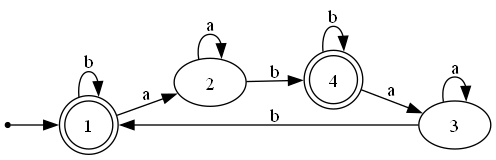

Automate après minimisation


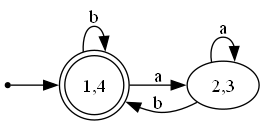

In [8]:
%run ../partie4/minimisation/minimisation.py

## Les problèmes rencontrés

### Problème 1 : Le choix de la structure de données

Nous avons commencé le projet en utilisant la structure de données suivante ; 
- Une classe `Automate` qui contenait les éléments suivant 
    - une liste pour l'alphabet
    - un set pour les états
    - un set pour les états initiaux
    - un set pour les états terminaux
    - un dictionnaire pour les transitions

Au début (partie 1 et 2), nous avons réussi à nous en sortir, mais nous avons rencontré des problèmes lors de la déterminisation de l'automate. Après avoir cherché des solutions pour résoudre le problème. N'en trouvant pas, nous avons décidé de changer de structure de données en utilisant trois classes différentes : `Automate`, `Etat` et `Transition`.
